## PROJ25: Machine Learning Project of Student Dropout Success dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.metrics import * 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV

# Changes
1. [Change path](#path-change) Change path to be relative and not dependent on machine
2. [Changes in BNB fit](#change-bnb-fit) Change numbering from 14 to 15

In [6]:
import warnings
warnings.filterwarnings("ignore", message='Glyph 9?')

### 1. DATA EXPLORATION (EDA)
<a id="path-change"></a>

In [2]:
# df = pd.read_csv('/Users/nima/Downloads/PROJ25/gruppuppgift/02_dataset/student_dropout_success/data.csv', sep=';')
df = pd.read_csv('./data.csv', sep=';') # Change path to be relative and not dependent on machine

In [8]:
df.info

<bound method DataFrame.info of       Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1              

In [9]:
print(df.keys())

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [10]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [11]:
df.shape

(4424, 37)

In [12]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [13]:
pd.isnull(df).sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [14]:
# Checking unique values in the Target attribute and the distribution of the unique values
target_types = Counter(df['Target'])
print(df['Target'].unique())
print(target_types)

['Dropout' 'Graduate' 'Enrolled']
Counter({'Graduate': 2209, 'Dropout': 1421, 'Enrolled': 794})


In [138]:
# Creating dataframe without enrolled
df2 = df.copy(deep=True)
df2 = df2[df2.Target != 'Enrolled']
target_types2 = Counter(df2['Target'])
print(df2['Target'].unique())
print(target_types2)

['Dropout' 'Graduate']
Counter({'Graduate': 2209, 'Dropout': 1421})


### 2. DATA PREPROCESSING

In [16]:
# Transforming Target to numerical values, Dropout=0, Enrolled=1, Graduate=2
dft = df.copy(deep=True)
le = LabelEncoder()
label = le.fit_transform(dft['Target'])
dft.drop("Target", axis=1, inplace=True)
dft["Target"] = label

In [17]:
target_types = Counter(dft['Target'])
print(dft['Target'].unique())
print(target_types)

[0 2 1]
Counter({2: 2209, 0: 1421, 1: 794})


In [18]:
dft.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [19]:
dft.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


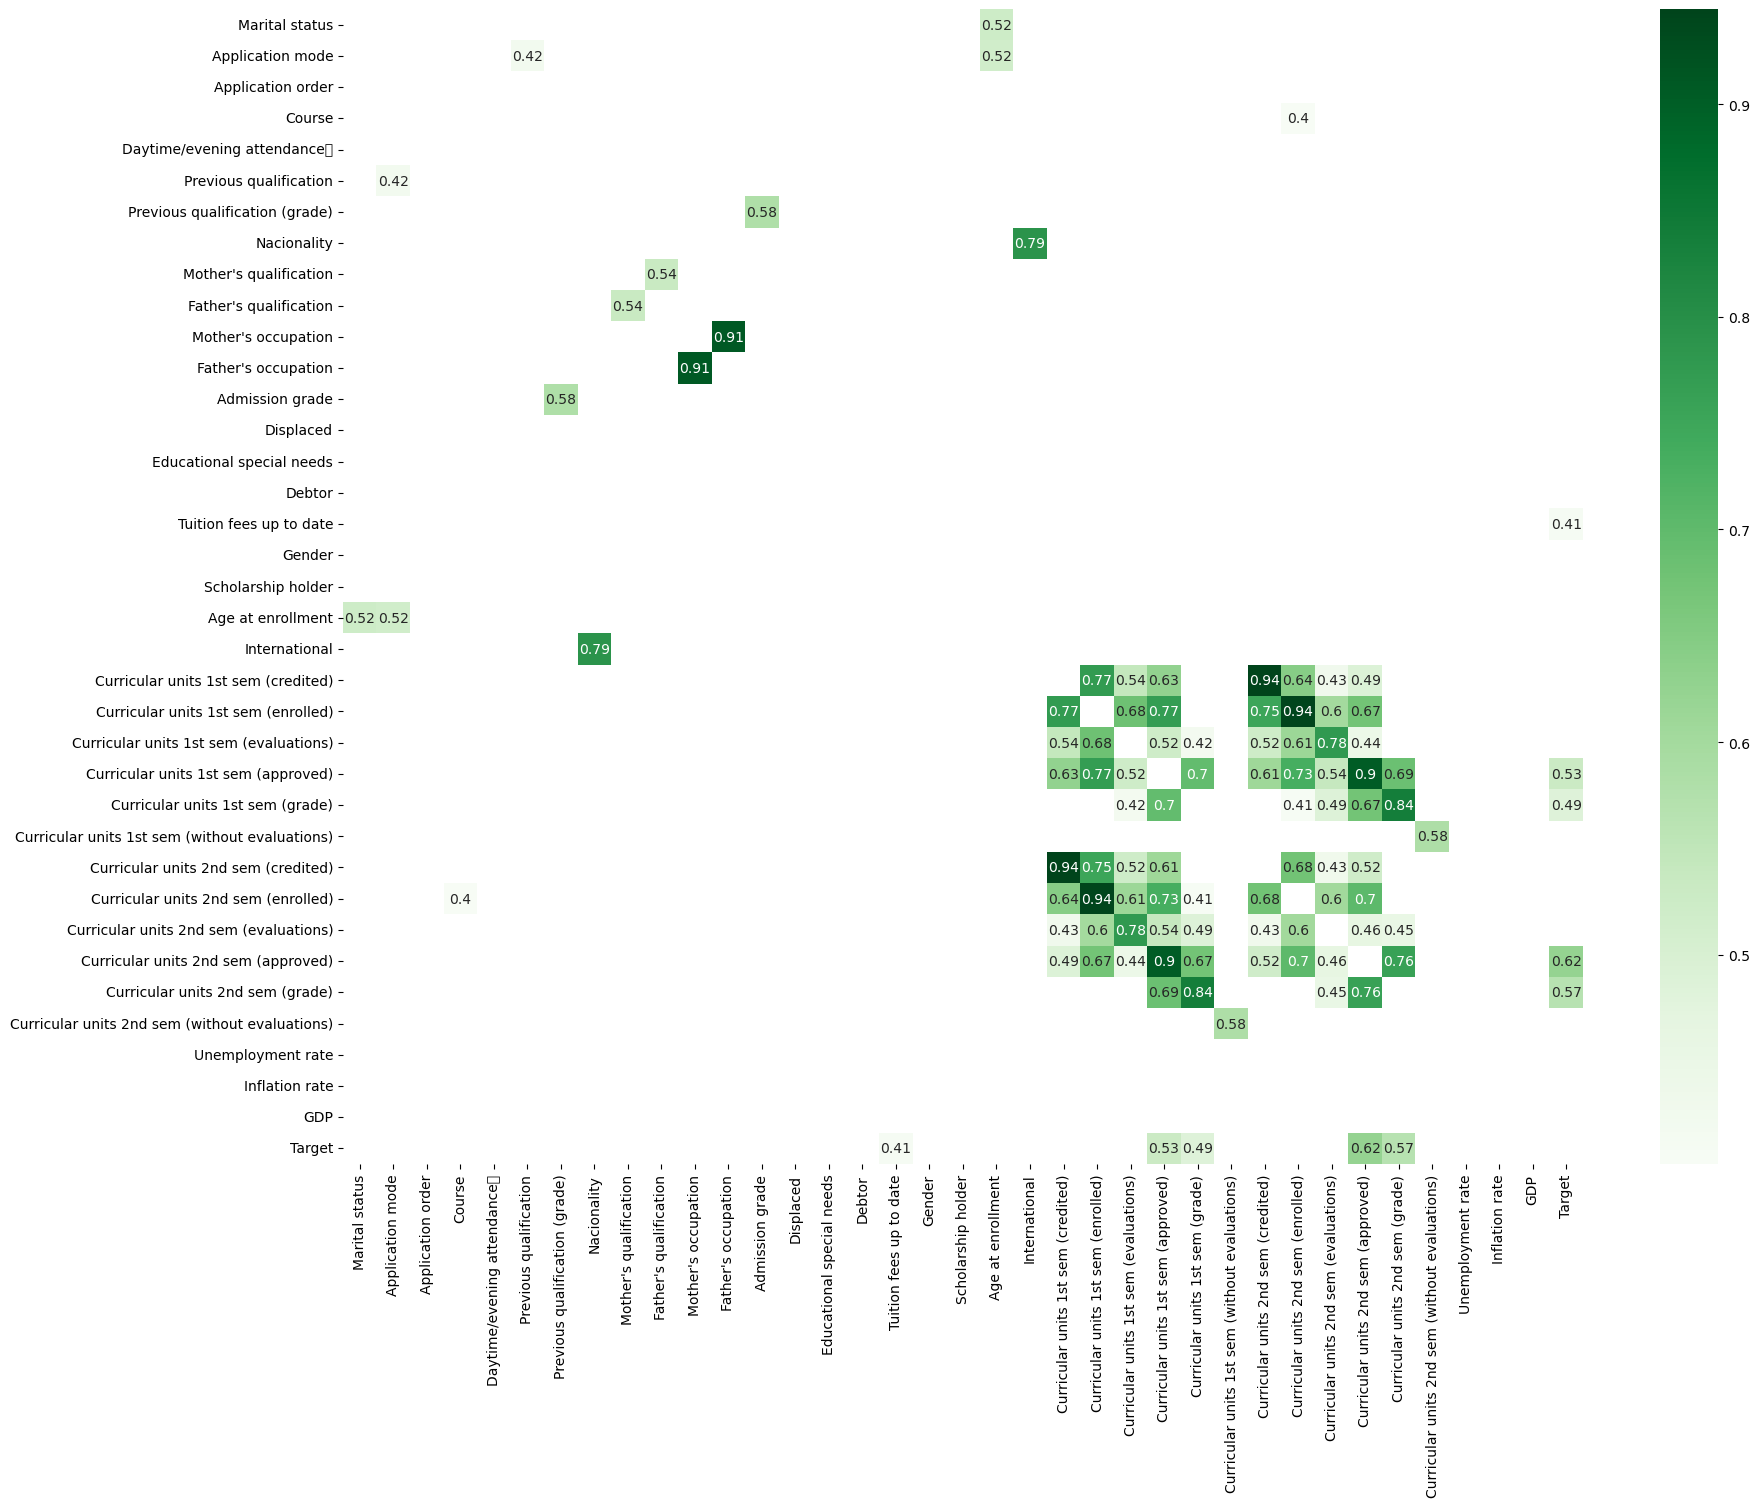

In [20]:
cmatrix = dft.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cmatrix[((cmatrix >= .4) | (cmatrix <= -.6)) & (cmatrix !=1.000)], annot=True, cmap="Greens")
plt.show()

In [21]:
pd.DataFrame(dft.corr()[dft.columns[-1:]]).sort_values(by=['Target'], ascending=False)

,Target
Target,1.000000
Curricular units 2nd sem (approved),0.624157
Curricular units 2nd sem (grade),0.566827
Curricular units 1st sem (approved),0.529123
Curricular units 1st sem (grade),0.485207
Tuition fees up to date,0.409827
Scholarship holder,0.297595
Curricular units 2nd sem (enrolled),0.175847
Curricular units 1st sem (enrolled),0.155974
Admission grade,0.120889


In [22]:
# Creating X, dataset without labels
X = dft.drop(['Target'], axis=1)

In [23]:
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [24]:
X.shape

(4424, 36)

In [25]:
# Creating y, the label dataset
y = dft['Target']

In [26]:
y.head()

0    0
1    2
2    0
3    2
4    2
Name: Target, dtype: int64

In [27]:
y.shape

(4424,)

In [28]:
y.unique()

array([0, 2, 1])

In [29]:
target_types = Counter(y)
print(target_types)

Counter({2: 2209, 0: 1421, 1: 794})


In [30]:
# Splitting the data into a training and a test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

Counter({2: 1767, 0: 1137, 1: 635})


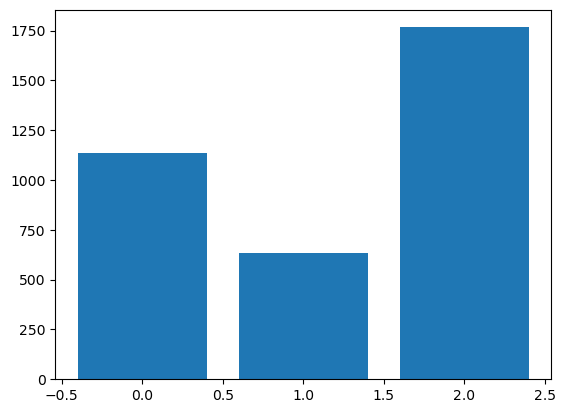

In [31]:
# Checking the distribution in the training dataset
y_lab = Counter(y_train)
print(y_lab)
plt.bar(y_lab.keys(), y_lab.values())
plt.show()

Counter({2: 442, 0: 284, 1: 159})


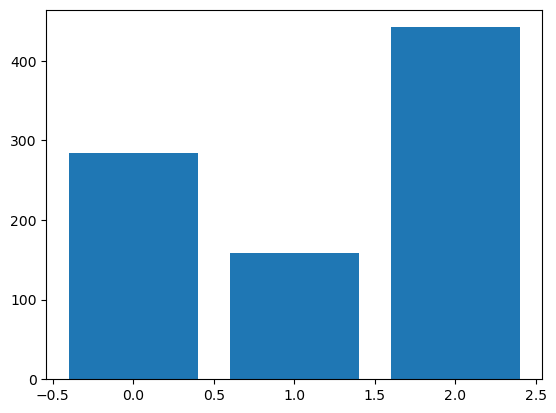

In [32]:
# Checking the distribution in the test dataset
y_lab_test = Counter(y_test)
print(y_lab_test)
plt.bar(y_lab_test.keys(), y_lab_test.values())
plt.show()

In [33]:
# Scaling the data with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

In [34]:
print('X_train(max):', np.max(X_train))
print('X_train(min):', np.min(X_train))
print('X_train_scaled(max):', round(np.max(X_train_scaled), 3))
print('X_train_scaled(min):', round(np.min(X_train_scaled), 3))
print('X_train(mean):', round(np.mean(X_train), 3))
print('X_train_scaled(mean):', round(np.mean(X_train_scaled), 3))
print('X_train(std):', round(np.std(X_train), 3))
print('X_train_scaled(std):', round(np.std(X_train_scaled), 3))

X_train(max): Marital status                                       6.000000
Application mode                                    53.000000
Application order                                    9.000000
Course                                            9991.000000
Daytime/evening attendance\t                         1.000000
Previous qualification                              43.000000
Previous qualification (grade)                     190.000000
Nacionality                                        109.000000
Mother's qualification                              44.000000
Father's qualification                              44.000000
Mother's occupation                                194.000000
Father's occupation                                195.000000
Admission grade                                    190.000000
Displaced                                            1.000000
Educational special needs                            1.000000
Debtor                                               1.0

/Users/nima/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/nima/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/nima/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### 3. MODEL DEVELOPMENT

- Choosing Models
- Training Models
- Evaluating Models
- Parameter Tuning


In [102]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB

lr = LogisticRegression()
gnb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
nn = MLPClassifier(max_iter=1000)
sgd = SGDClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
la = Lasso()
en = ElasticNet()
gpc = GaussianProcessClassifier()
pt = Perceptron()
bnb = BernoulliNB()

In [93]:
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)
tacc1 = round(accuracy_score(y_train, y_pred), 2)
acc1 = round(accuracy_score(y_test, y_pred_test), 2)
prec1 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec1 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco1 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [94]:
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_train_scaled)
y_pred_test = gnb.predict(X_test_scaled)
tacc2 = round(accuracy_score(y_train, y_pred), 2)
acc2 = round(accuracy_score(y_test, y_pred_test), 2)
prec2 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec2 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco2 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [95]:
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_train_scaled)
y_pred_test = knn.predict(X_test_scaled)
tacc3 = round(accuracy_score(y_train, y_pred), 2)
acc3 = round(accuracy_score(y_test, y_pred_test), 2)
prec3 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec3 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco3 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [96]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
tacc4 = round(accuracy_score(y_train, y_pred), 2)
acc4 = round(accuracy_score(y_test, y_pred_test), 2)
prec4 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec4 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco4 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [97]:
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_train_scaled)
y_pred_test = rf.predict(X_test_scaled)
tacc5 = round(accuracy_score(y_train, y_pred), 2)
acc5 = round(accuracy_score(y_test, y_pred_test), 2)
prec5 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec5 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco5 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [98]:
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_train_scaled)
y_pred_test = svc.predict(X_test_scaled)
tacc6 = round(accuracy_score(y_train, y_pred), 2)
acc6 = round(accuracy_score(y_test, y_pred_test), 2)
prec6 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec6 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco6 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [103]:
nn.fit(X_train_scaled, y_train)
y_pred = nn.predict(X_train_scaled)
y_pred_test = nn.predict(X_test_scaled)
tacc7 = round(accuracy_score(y_train, y_pred), 2)
acc7 = round(accuracy_score(y_test, y_pred_test), 2)
prec7 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec7 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco7 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [104]:
sgd.fit(X_train_scaled, y_train)
y_pred = sgd.predict(X_train_scaled)
y_pred_test = sgd.predict(X_test_scaled)
tacc8 = round(accuracy_score(y_train, y_pred), 2)
acc8 = round(accuracy_score(y_test, y_pred_test), 2)
prec8 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec8 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco8 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [105]:
gbc.fit(X_train_scaled, y_train)
y_pred = gbc.predict(X_train_scaled)
y_pred_test = gbc.predict(X_test_scaled)
tacc9 = round(accuracy_score(y_train, y_pred), 2)
acc9 = round(accuracy_score(y_test, y_pred_test), 2)
prec9 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec9 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco9 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [106]:
abc.fit(X_train_scaled, y_train)
y_pred = abc.predict(X_train_scaled)
y_pred_test = abc.predict(X_test_scaled)
tacc10 = round(accuracy_score(y_train, y_pred), 2)
acc10 = round(accuracy_score(y_test, y_pred_test), 2)
prec10 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec10 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco10 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [107]:
lda.fit(X_train_scaled, y_train)
y_pred = lda.predict(X_train_scaled)
y_pred_test = lda.predict(X_test_scaled)
tacc11 = round(accuracy_score(y_train, y_pred), 2)
acc11 = round(accuracy_score(y_test, y_pred_test), 2)
prec11 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec11 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco11 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [108]:
qda.fit(X_train_scaled, y_train)
y_pred = qda.predict(X_train_scaled)
y_pred_test = qda.predict(X_test_scaled)
tacc12 = round(accuracy_score(y_train, y_pred), 2)
acc12 = round(accuracy_score(y_test, y_pred_test), 2)
prec12 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec12 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco12 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [109]:
gpc.fit(X_train_scaled, y_train)
y_pred = gpc.predict(X_train_scaled)
y_pred_test = gpc.predict(X_test_scaled)
tacc13 = round(accuracy_score(y_train, y_pred), 2)
acc13 = round(accuracy_score(y_test, y_pred_test), 2)
prec13 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec13 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco13 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [110]:
pt.fit(X_train_scaled, y_train)
y_pred = pt.predict(X_train_scaled)
y_pred_test = pt.predict(X_test_scaled)
tacc14 = round(accuracy_score(y_train, y_pred), 2)
acc14 = round(accuracy_score(y_test, y_pred_test), 2)
prec14 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec14 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco14 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

<a id="change-bnb-fit"></a>

In [4]:
# Was using the variable names as pt.fit section, (<name>14), changed it to <name>15 so it works with the summary

bnb.fit(X_train_scaled, y_train)
y_pred = bnb.predict(X_train_scaled)
y_pred_test = bnb.predict(X_test_scaled)
tacc15 = round(accuracy_score(y_train, y_pred), 2)
acc15 = round(accuracy_score(y_test, y_pred_test), 2)
prec15 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec15 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco15 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [112]:
summary = pd.DataFrame({'Train Accuracy':[tacc1, tacc2, tacc3, tacc4, tacc5, tacc6, tacc7, tacc8, tacc9, tacc10, tacc11, tacc12, tacc13, tacc14, tacc15],\
                        'Test Accuracy':[acc1, acc2, acc3, acc4, acc5, acc6, acc7, acc8, acc9, acc10, acc11, acc12, acc13, acc14, acc15],\
                   'Test Precision':[prec1, prec2, prec3, prec4, prec5, prec6, prec7, prec8, prec9, prec10, prec11, prec12, prec13, prec14, prec15],\
                   'Test Recall':[rec1, rec2, rec3, rec4, rec5, rec6, rec7, rec8, rec9, rec10, rec11, rec12, rec13, rec14, rec15],\
                   'Test F1-score':[f1sco1, f1sco2, f1sco3, f1sco6, f1sco5, f1sco6, f1sco7, f1sco8, f1sco9, f1sco10, f1sco11, f1sco12, f1sco13, f1sco14, f1sco15]},\
                   index=['Logistic Regression', 'Gaussian Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest', 'SVC', 'MLP', 'SGD', 'Gradient Boosting', 'AdaBoost', 'LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis', 'Gaussian Process', 'Perceptron', 'Bernoulli Naive Bayes'])
display(summary)

,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1-score
Logistic Regression,0.7700,0.76,0.75,0.76,0.75
Gaussian Naive Bayes,0.6900,0.68,0.66,0.68,0.67
KNN,0.7900,0.67,0.66,0.67,0.66
Decision Tree,1.0000,0.67,0.67,0.67,0.76
Random Forest,1.0000,0.78,0.76,0.78,0.76
SVC,0.8200,0.77,0.76,0.77,0.76
MLP,1.0000,0.68,0.69,0.68,0.69
SGD,0.7500,0.73,0.71,0.73,0.71
Gradient Boosting,0.8400,0.77,0.76,0.77,0.76
AdaBoost,0.7600,0.76,0.74,0.76,0.75


The summary shows that the models Logistic Regression, Random Forest, Gradient Boosting and SVC have the most potential for further investigation. These will be chosen for the Hyperparameter Tuning and for Ensemble method.

In [133]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression()
#create our voting classifier
ensemble = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('gbc', gbc), ('svc', svc)], voting='hard', n_jobs=-1)

In [137]:
#fit model to training data
ensemble.fit(X_train_scaled, y_train)

#test our model on the test data
print(ensemble.score(X_train_scaled, y_train))
print(ensemble.score(X_test_scaled, y_test))

0.8578694546482057
0.7796610169491526


In [400]:
# Hyperparameters
params_lr = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'solver':['lbfgs', 'saga', 'sag', 'liblinear'],
             'max_iter':[300]}

params_svc = {'kernel':['linear', 'poly', 'rbf'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma':['scale', 'auto', 0.1, 1, 10, 100],
              'coef0':[0, 1]}

params_rf = {'bootstrap': [True, False],
             'max_depth': [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'max_features': ['auto', 'sqrt', 'log2', None],
             'min_samples_leaf': [1, 2, 4, 10, 30, 60],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [10, 50, 100, 200, 500, 1000, 1500, 2000]}

# max_iter = epochs

# RandomizedSearchCV
racv_lr = RandomizedSearchCV(lr, params_lr, n_jobs=-1, cv=5)
racv_svc = RandomizedSearchCV(svc, params_svc, n_jobs=-1, cv=5)
racv_rf = RandomizedSearchCV(rf, params_rf, n_jobs=-1, cv=5)
racv_nn = RandomizedSearchCV(nn, params_nn, n_jobs=-1, cv=5)

In [374]:
%%time
# RandomizedSearchCV lr
racv_lr.fit(X_train_scaled, y_train)

CPU times: user 345 ms, sys: 17.4 ms, total: 363 ms
Wall time: 774 ms


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'max_iter': [300],
                                        'solver': ['lbfgs', 'saga', 'sag',
                                                   'liblinear']})

In [375]:
# Print best hyperparameter settings after tuning
print(racv_lr.best_params_)
# Print best score
print('Accuracy with optimized hyperparameters:', racv_lr.best_score_)
print('Accuracy with default hyperparameters:', lr_acc)

{'solver': 'lbfgs', 'max_iter': 300, 'C': 10}
LogisticRegression(C=10, max_iter=300)
Accuracy with optimized hyperparameters: 0.7694247996228194
Accuracy with default hyperparameters: 0.7799


In [376]:
%%time
# RandomizedSearchCV svc
racv_svc.fit(X_train_scaled, y_train)

CPU times: user 24.8 s, sys: 53.9 ms, total: 24.9 s
Wall time: 56.6 s


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'coef0': [0, 1],
                                        'gamma': ['scale', 'auto', 0.1, 1, 10,
                                                  100],
                                        'kernel': ['linear', 'poly', 'rbf']})

In [377]:
# Print best hyperparameter settings after tuning
print(racv_svc.best_params_)
# Print best score
print('Accuracy with optimized hyperparameters:', racv_svc.best_score_)
print('Accuracy with default hyperparameters:', svc_acc)

{'kernel': 'linear', 'gamma': 'auto', 'coef0': 1, 'C': 100}
SVC(C=100, coef0=1, gamma='auto', kernel='linear')
Accuracy with optimized hyperparameters: 0.7691451106369718
Accuracy with default hyperparameters: 0.8203


In [378]:
%%time
# RandomizedSearchCV rf
racv_rf.fit(X_train_scaled, y_train)

CPU times: user 3.01 s, sys: 113 ms, total: 3.12 s
Wall time: 40.2 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 5, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 10, 30,
                                                             60],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         1000, 1500, 2000]})

In [379]:
# Print best hyperparameter settings after tuning
print(racv_rf.best_params_)
# Print best score
print('Accuracy with optimized hyperparameters:', racv_rf.best_score_)
print('Accuracy with default hyperparameters:', rf_acc)

{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}
Accuracy with optimized hyperparameters: 0.7835510911866005
Accuracy with default hyperparameters: 1.0


In [ ]:
# balansera datasettet

In [ ]:
# remove enrolled, balansera datasettet

In [318]:
lr.fit(X_train_scaled, y_train)
importance_lr = pd.DataFrame(data={
    'attr': X_train.columns,
    'im_lr': lr.coef_[0]
})
importance_lr = importance_lr.sort_values(by='im_lr', ascending=False)

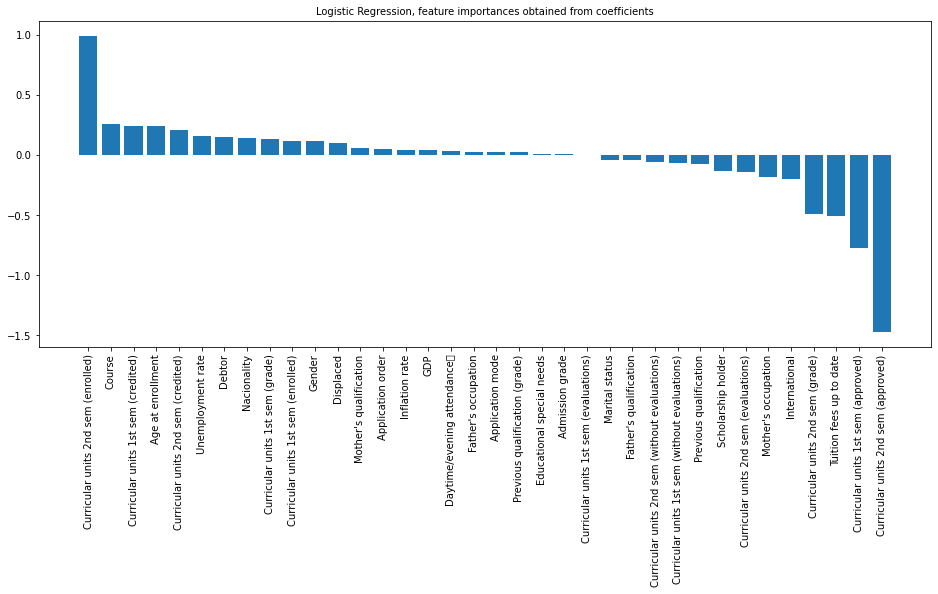

In [319]:
plt.figure(figsize=(16,6))
plt.bar(x=importance_lr['attr'], height=importance_lr['im_lr'])
plt.title('Logistic Regression, feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

In [320]:
rf.fit(X_train_scaled, y_train)
importance_rf = pd.DataFrame(data={
    'attr': X_train.columns,
    'im_rf': rf.feature_importances_
})
importance_rf = importance_rf.sort_values(by='im_rf', ascending=False)

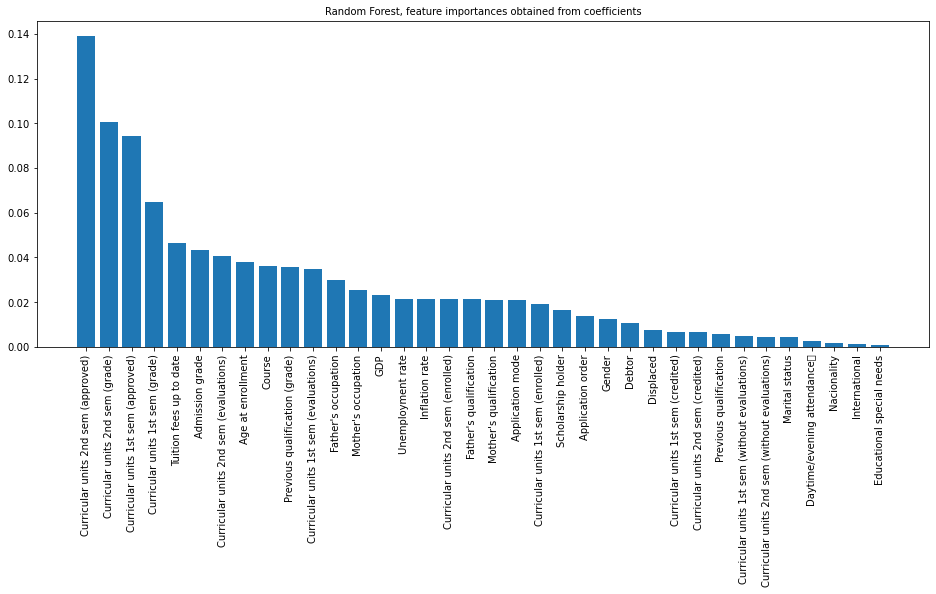

In [327]:
plt.figure(figsize=(16,6))
plt.bar(x=importance_rf['attr'], height=importance_rf['im_rf'])
plt.title('Random Forest, feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = ['input1', 'input2']
svm = svm.SVC(kernel='linear')
svm.fit(X, Y)
f_importances(svm.coef_, features_names)

In [23]:
%%time
# Train RaCV svc
racv_svc.fit(X_mini_scaled, y_mini)
# CPU times: user 5.49 s, sys: 44.6 ms, total: 5.54 s

CPU times: user 5.49 s, sys: 44.6 ms, total: 5.54 s
Wall time: 5.57 s


RandomizedSearchCV(cv=3, estimator=SVC(random_state=42),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'coef0': [0, 1],
                                        'gamma': ['scale', 'auto', 0.1, 1, 10],
                                        'kernel': ['poly', 'rbf']})

In [24]:
# Print best parameter after tuning
print(racv_svc.best_params_)
# Print how our model looks after hyperparameter tuning
print(racv_svc.best_estimator_)
# Print best score
print(racv_svc.best_score_)

{'kernel': 'rbf', 'gamma': 'auto', 'coef0': 1, 'C': 1}
SVC(C=1, coef0=1, gamma='auto', random_state=42)
0.8550166933400467


In [280]:
print('Best hyperparameters using GridSearchCV:')
print('SVC best hyperparameters:', grcv_svc.best_params_, ', score:', grcv_svc.best_score_)
print('Logistic Regression best hyperparameters:', grcv_lr.best_params_, ', score:', grcv_lr.best_score_)
print('Random Forest best hyperparameters:', grcv_rfc.best_params_, ', score:', grcv_rfc.best_score_)
print('KNN best hyperparameters:', grcv_knn.best_params_, ', score:', grcv_knn.best_score_)
print()
print('Best hyperparameters using RandomizedSearchCV:')
print('SVC best hyperparameters:', racv_svc.best_params_, ', score:', racv_svc.best_score_)
print('Logistic Regression best hyperparameters:',racv_lr.best_params_, ', score:', racv_lr.best_score_)
print('Random Forest best hyperparameters:',racv_rfc.best_params_, ', score:', racv_rfc.best_score_)
print('KNN best hyperparameters:',racv_knn.best_params_, ', score:', racv_knn.best_score_)

Best hyperparameters using GridSearchCV:
SVC best hyperparameters: {'C': 1, 'coef0': 1, 'gamma': 'auto', 'kernel': 'poly'} , score: 0.8829877781973591
Logistic Regression best hyperparameters: {'C': 0.1, 'solver': 'lbfgs'} , score: 0.8649907392422361
Random Forest best hyperparameters: {'max_depth': 10, 'max_leaf_nodes': 50} , score: 0.8650027272781764
KNN best hyperparameters: {'leaf_size': 1, 'n_neighbors': 1, 'p': 1} , score: 0.8159866453279627

Best hyperparameters using RandomizedSearchCV:
SVC best hyperparameters: {'kernel': 'poly', 'gamma': 1, 'coef0': 1, 'C': 0.01} , score: 0.8239976503449556
Logistic Regression best hyperparameters: {'solver': 'lbfgs', 'C': 1} , score: 0.8649817482152811
Random Forest best hyperparameters: {'max_leaf_nodes': 50, 'max_depth': 10} , score: 0.8650027272781764
KNN best hyperparameters: {'p': 1, 'n_neighbors': 1, 'leaf_size': 2} , score: 0.8159866453279627


### 6. Running optimized Models, comparing performance between models

There was a slight difference between GridSearchCV and RandomizedSearchCV on the SVC model, for the other models the result was pretty much identical. The conclusion is that RandomizedSearchCV is a better choice in most cases since it's significantly faster to run than GridSearchCV. The models now using the optimized hyperparameters are now trained on the full training dataset in this comparison in performance between models. KNN was excluded from this step for two reasons, first it took a very long time to run it on the whole training dataset, second it had the worst scores out of the models in the hyperparameter tuning step.

The command line svc = grcv_svc.best_estimator_ could be used to give the model the optimized hyperparameters, but I decided to copy in the hyperparameters from the output of grcv_svc.best_estimator_, it makes it clearer when you read the code which numbers for the hyperparameters was actually used in the model. The same was done for the models lr and rfc.

In [30]:
%%time
# 1. SVC
svc = SVC(C=1, coef0=1, gamma='auto', kernel='poly', random_state=42) # same as svc = grcv_svc.best_estimator_
svc.fit(X_train_scaled, y_train)
# time to run cell: 2min 22s

CPU times: user 2min 21s, sys: 1.41 s, total: 2min 22s
Wall time: 2min 22s


SVC(C=1, coef0=1, gamma='auto', kernel='poly', random_state=42)

In [32]:
%%time
y_pred = svc.predict(X_train_scaled)
y_pred_test = svc.predict(X_test_scaled)
# time to run cell: 4min 44s

CPU times: user 4min 43s, sys: 780 ms, total: 4min 44s
Wall time: 4min 45s


In [33]:
print("Accuracy score on training dataset:", round(accuracy_score(y_train, y_pred), 4))
print("Accuracy score on test dataset:", round(accuracy_score(y_test, y_pred_test), 4))
acc1 = round(accuracy_score(y_test, y_pred_test), 4)
prec1 = round(precision_score(y_test, y_pred_test, average='weighted'), 4)
rec1 = round(recall_score(y_test, y_pred_test, average='weighted'), 4)
f1sco1 = round(f1_score(y_test, y_pred_test, average='weighted'), 4)

Accuracy score on training dataset: 0.9944
Accuracy score on test dataset: 0.9754


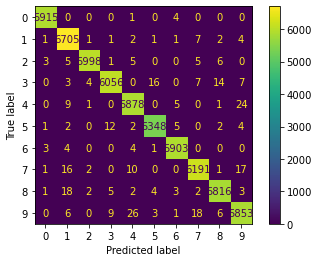

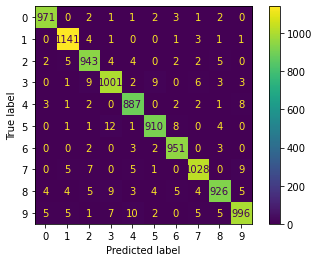

In [34]:
# Printing out a confusion matrix to get an overview of the predicted digits.
# The most problematic ones are 4's and 9's that has the highest error prediction in the matrix.
# This makes sense since 4 and 9 are quite similar in their appearance and probably even more so when handwritten.
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

In [35]:
# Printing out all the important scores such as accuracy, precision, recall and f1-score.
# In total, but also scores for each digit so you can see if the model had a problem with a particular digit.
print(classification_report(y_train, y_pred))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5920
           1       0.99      1.00      0.99      6725
           2       1.00      1.00      1.00      6023
           3       1.00      0.99      0.99      6107
           4       0.99      0.99      0.99      5918
           5       1.00      0.99      1.00      5376
           6       1.00      1.00      1.00      5915
           7       0.99      0.99      0.99      6238
           8       0.99      0.99      0.99      5856
           9       0.99      0.99      0.99      5922

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       0.98      0.99      0.99      1152
           2       0.97      0.98      0.97       967
           3       0.97 

In [36]:
%%time
# 2. Logistic Regression
lr = LogisticRegression(C=0.1, solver='lbfgs', max_iter=5000, random_state=42)
lr.fit(X_train_scaled, y_train)
# time to run cell: 2min 34s

CPU times: user 2min 32s, sys: 1.97 s, total: 2min 34s
Wall time: 39 s


LogisticRegression(C=0.1, max_iter=5000, random_state=42)

In [40]:
%%time
y_pred = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)
# time to run cell: 226 ms

CPU times: user 203 ms, sys: 5.49 ms, total: 209 ms
Wall time: 74.6 ms


In [38]:
print("Accuracy score on training dataset:", round(accuracy_score(y_train, y_pred), 4))
print("Accuracy score on test dataset:", round(accuracy_score(y_test, y_pred_test), 4))
acc2 = round(accuracy_score(y_test, y_pred_test), 4)
prec2 = round(precision_score(y_test, y_pred_test, average='weighted'), 4)
rec2 = round(recall_score(y_test, y_pred_test, average='weighted'), 4)
f1sco2 = round(f1_score(y_test, y_pred_test, average='weighted'), 4)

Accuracy score on training dataset: 0.9423
Accuracy score on test dataset: 0.9208


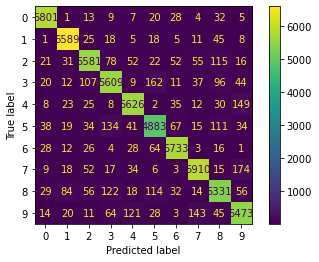

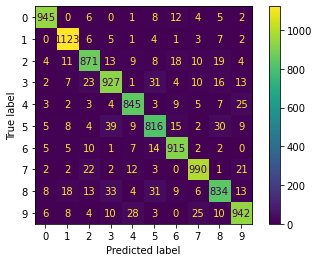

In [39]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

In [41]:
print(classification_report(y_train, y_pred))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5920
           1       0.97      0.98      0.97      6725
           2       0.94      0.93      0.93      6023
           3       0.93      0.92      0.92      6107
           4       0.95      0.95      0.95      5918
           5       0.92      0.91      0.91      5376
           6       0.96      0.97      0.96      5915
           7       0.95      0.95      0.95      6238
           8       0.91      0.91      0.91      5856
           9       0.92      0.92      0.92      5922

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       983
           1       0.95      0.97      0.96      1152
           2       0.91      0.90      0.90       967
           3       0.90 

In [42]:
%%time
# 3. Random Forest
rfc = RandomForestClassifier(max_depth=10, max_leaf_nodes=50, random_state=42)
rfc.fit(X_train_scaled,y_train)
# time to run cell: 20.6 s

CPU times: user 20.4 s, sys: 122 ms, total: 20.6 s
Wall time: 20.6 s


RandomForestClassifier(max_depth=10, max_leaf_nodes=50, random_state=42)

In [43]:
%%time
y_pred = rfc.predict(X_train_scaled)
y_pred_test = rfc.predict(X_test_scaled)
# time to run cell: 1.53 s

CPU times: user 1.39 s, sys: 133 ms, total: 1.53 s
Wall time: 1.54 s


In [44]:
print("Accuracy score on training dataset:", round(accuracy_score(y_train, y_pred), 4))
print("Accuracy score on test dataset:", round(accuracy_score(y_test, y_pred_test), 4))
acc3 = round(accuracy_score(y_test, y_pred_test), 4)
prec3 = round(precision_score(y_test, y_pred_test, average='weighted'), 4)
rec3 = round(recall_score(y_test, y_pred_test, average='weighted'), 4)
f1sco3 = round(f1_score(y_test, y_pred_test, average='weighted'), 4)

Accuracy score on training dataset: 0.8921
Accuracy score on test dataset: 0.6841


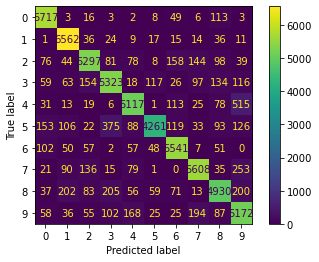

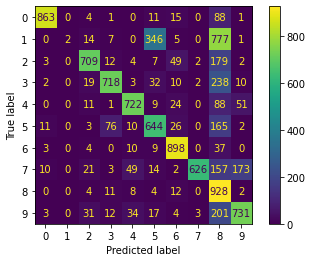

In [45]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

In [46]:
print(classification_report(y_train, y_pred))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5920
           1       0.92      0.98      0.94      6725
           2       0.90      0.88      0.89      6023
           3       0.87      0.87      0.87      6107
           4       0.90      0.86      0.88      5918
           5       0.94      0.79      0.86      5376
           6       0.91      0.94      0.92      5915
           7       0.91      0.90      0.91      6238
           8       0.87      0.84      0.86      5856
           9       0.80      0.87      0.84      5922

    accuracy                           0.89     60000
   macro avg       0.89      0.89      0.89     60000
weighted avg       0.89      0.89      0.89     60000

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       983
           1       1.00      0.00      0.00      1152
           2       0.86      0.73      0.79       967
           3       0.85 

### 4. MODEL EVALUATION

In [50]:
summary = pd.DataFrame({'Accuracy':[acc1, acc2, acc3],\
                   'Precision':[prec1, prec2, prec3],\
                   'Recall':[rec1, rec2, rec3],\
                   'F1-score':[f1sco1, f1sco2, f1sco3]},\
                   index=['SVC', 'Logistic Regression', 'RandomForest'])
print(summary)

                     Accuracy  Precision  Recall  F1-score
SVC                    0.9754     0.9754  0.9754    0.9754
Logistic Regression    0.9208     0.9205  0.9208    0.9206
RandomForest           0.6841     0.8112  0.6841    0.6677


In [ ]:
# Running randomizedsearchcv once again to see if we can tweak the hyperparameters even more
params = { 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'C': list(np.arange(0.2, 5, 0.2)),\
          'kernel':['poly', 'rbf', 'sigmoid'], 'coef0':[0, 1]}
racv = RandomizedSearchCV(svc, params, n_iter=10, n_jobs=-1, cv=5)
racv.fit(X_mini_scaled, y_mini)

In [ ]:
# Print best parameter after tuning
print(racv.best_params_)
# Print how our model looks after hyperparameter tuning
print(racv.best_estimator_)
# Print best score
print(racv.best_score_)

In [379]:
svc_rand = racv.best_estimator_ #(C=3.2, coef0=1, gamma=0.001, kernel='rbf', random_state=42)
svc_rand.fit(X_train_scaled, y_train)

SVC(C=3.2, coef0=1, gamma=0.001, random_state=42)

In [380]:
y_pred = svc_rand.predict(X_train_scaled)
y_pred_test = svc_rand.predict(X_test_scaled)

In [382]:
print("Accuracy score on training dataset:", round(accuracy_score(y_train, y_pred), 4))
print("Accuracy score on test dataset:", round(accuracy_score(y_test, y_pred_test), 4))

Accuracy score on training dataset: 0.9923
Accuracy score on test dataset: 0.9671


In [167]:
%%time
# Running Dimension Reduction on the dataset with PCA
pca = PCA(n_components = 0.95)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)
print(X_train_reduced.shape)
print(X_test_reduced.shape)
# time to run cell: 11.3 s

(60000, 330)
(10000, 330)
CPU times: user 10.6 s, sys: 693 ms, total: 11.3 s
Wall time: 4.12 s


In [168]:
%%time
svc = SVC(C=1, coef0=1, gamma='auto', kernel='poly', random_state=42)
svc.fit(X_train_reduced, y_train)
# time to run cell: 1min 10s

CPU times: user 1min 9s, sys: 1.28 s, total: 1min 10s
Wall time: 1min 11s


SVC(C=1, coef0=1, gamma='auto', kernel='poly', random_state=42)

In [169]:
%%time
y_pred = svc.predict(X_train_reduced)
y_pred_test = svc.predict(X_test_reduced)
# time to run cell: 1min 59s

CPU times: user 1min 59s, sys: 466 ms, total: 1min 59s
Wall time: 2min


In [170]:
print("Accuracy score on reduced training dataset:", round(accuracy_score(y_train, y_pred), 4))
print("Accuracy score reduced on test dataset:", round(accuracy_score(y_test, y_pred_test), 4))

Accuracy score on reduced training dataset: 0.999
Accuracy score reduced on test dataset: 0.978


The dimension reduction with PCA actually improved both the accuracy score and the processing time, the time was now less than half compared to before. For this reason the PCA will also be built into the pipeline for the final model.

In [25]:
# Building a pipeline with Standardscaler, PCA, Parameters and Model.   
X = X_train
y = y_train
X2 = X_test
y2 = y_test

svc_final = Pipeline([
    ('std_scaler', StandardScaler()),
    ('pca', PCA(n_components = 0.95)),
    ('svc', SVC(C=1, coef0=1, gamma='auto', kernel='poly')),
    ])

svc_final.fit(X, y)
pred_train = svc_final.predict(X)
pred_test = svc_final.predict(X2)

In [26]:
print("Accuracy score on training dataset:", round(accuracy_score(y, pred_train), 4))
print("Accuracy score on test dataset:", round(accuracy_score(y2, pred_test), 4))

Accuracy score on training dataset: 0.999
Accuracy score on test dataset: 0.9777


### 5. CONCLUSIONS